<a href="https://colab.research.google.com/github/LuccaMello7/AnaliseCriminalidadeEstadoDoRJ/blob/main/RioAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://raw.githubusercontent.com/LuccaMello7/AnaliseCriminalidadeEstadoDoRJ/main/Analise%20sobre%20a%20Criminalidade%20no%20Estado%20do%20RJ.png)

#Analise sobre a Criminalidade e Violencia no Estado do RJ

Desde os anos 70, o Estado do RJ passa por um problema gravissimo: **aumento da violencia**, péssimos indicadores sociais e tambem uma grande desigualdade territorial.

Isso se deve tambem ao fato de inumeras gestoes mal-sucedidas e enormes problemas de corrupcao nos seus governos. Essas acoes fizeram esses dados que ja eram alarmantes, se acentuarem.

[Referência: Jornal dos Economistas, Ed. Maio/2018](https://www.corecon-rj.org.br/anexos/B5015AA107369AFF52F95450A7CE9B58.pdf)

#Obtendo os dados

Para realizarmos essa análise da criminalidade do estado do Rio de Janeiro, vamos utilizar os dados fornecidos publicamente através do Portal ISPDados. No portal podemos acessar as bases de dados de registros criminais e de atividade policial no estado.
As estatísticas divulgadas no site são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL). Os Registros de Ocorrência são submetidos ao controle de qualidade realizados pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil, e após isso, são consolidados no ISP.
Nessa análise, utilizaremos o dataset que pode ser baixado aqui: [Violência no Rio de Janeiro](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).



In [2]:
!pip install pywaffle -q

     |████████████████████████████████| 532kB 5.6MB/s 


In [3]:
#importando os pacotes necessarios para a analise

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

%matplotlib inline
DATA_PATH = ('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

In [4]:
#importando o Dataset e analisando as primeiras entradas

df = pd.read_csv(DATA_PATH)

#df.head()

In [5]:

#analisando o tamanho do data frame
print('Nosso conjunto de dados possui', df.shape[0], 'entradas e', df.shape[1], 'variáveis.' )

Nosso conjunto de dados possui 344 entradas e 56 variáveis.


In [6]:
#checar a porcentagem de valores ausentes no dataset e fazer a importacao dos mesmos em um grafico para uma melhor leitura

((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2).sort_values(ascending=False)

roubo_bicicleta               80.23
furto_bicicleta               80.23
apreensao_drogas_sem_autor    52.33
posse_drogas                  52.33
apf                           52.33
aaapai                        52.33
cmp                           52.33
trafico_drogas                52.33
cmba                          52.33
sequestro_relampago           41.86
furto_coletivo                41.86
extorsao                      41.86
furto_celular                 41.86
roubo_apos_saque              41.86
roubo_conducao_saque          41.86
roubo_cx_eletronico           41.86
estupro                       41.86
estelionato                   41.86
pol_civis_mortos_serv         41.86
pol_militares_mortos_serv     41.86
pessoas_desaparecidas         38.37
encontro_ossada               38.37
roubo_celular                 31.40
lesao_corp_culposa            27.91
ameaca                        27.91
sequestro                     27.91
lesao_corp_morte              27.91
registro_ocorrencias        

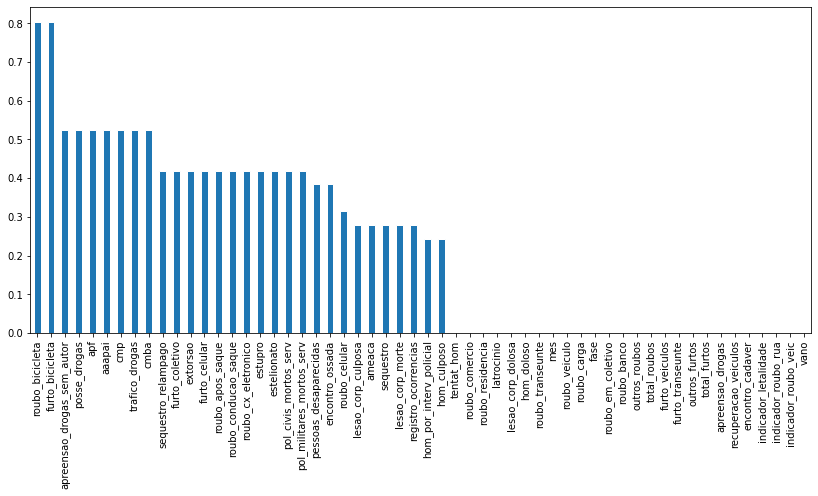

In [7]:
fig, ax = plt.subplots(figsize=(14,6))
sns.set_style('white')
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False).plot(kind='bar');
fig.savefig('null.jpg')
fig.show()

Com o primeiro grafico ja gerado do nosso dataset podemos ver que os roubos e furtos de bicileta possuem cerca de 80% dos dados dos seus valores ausente, o que leva a crer que a vitima nao registra um boletim de ocorrencia para esses casos. 

O que retrata fielmente a nossa checagem de valores ausentes nas linhas acima.

In [9]:
#verificar o tipo dos dados para que possamos dar seguimento as nossas analises.
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

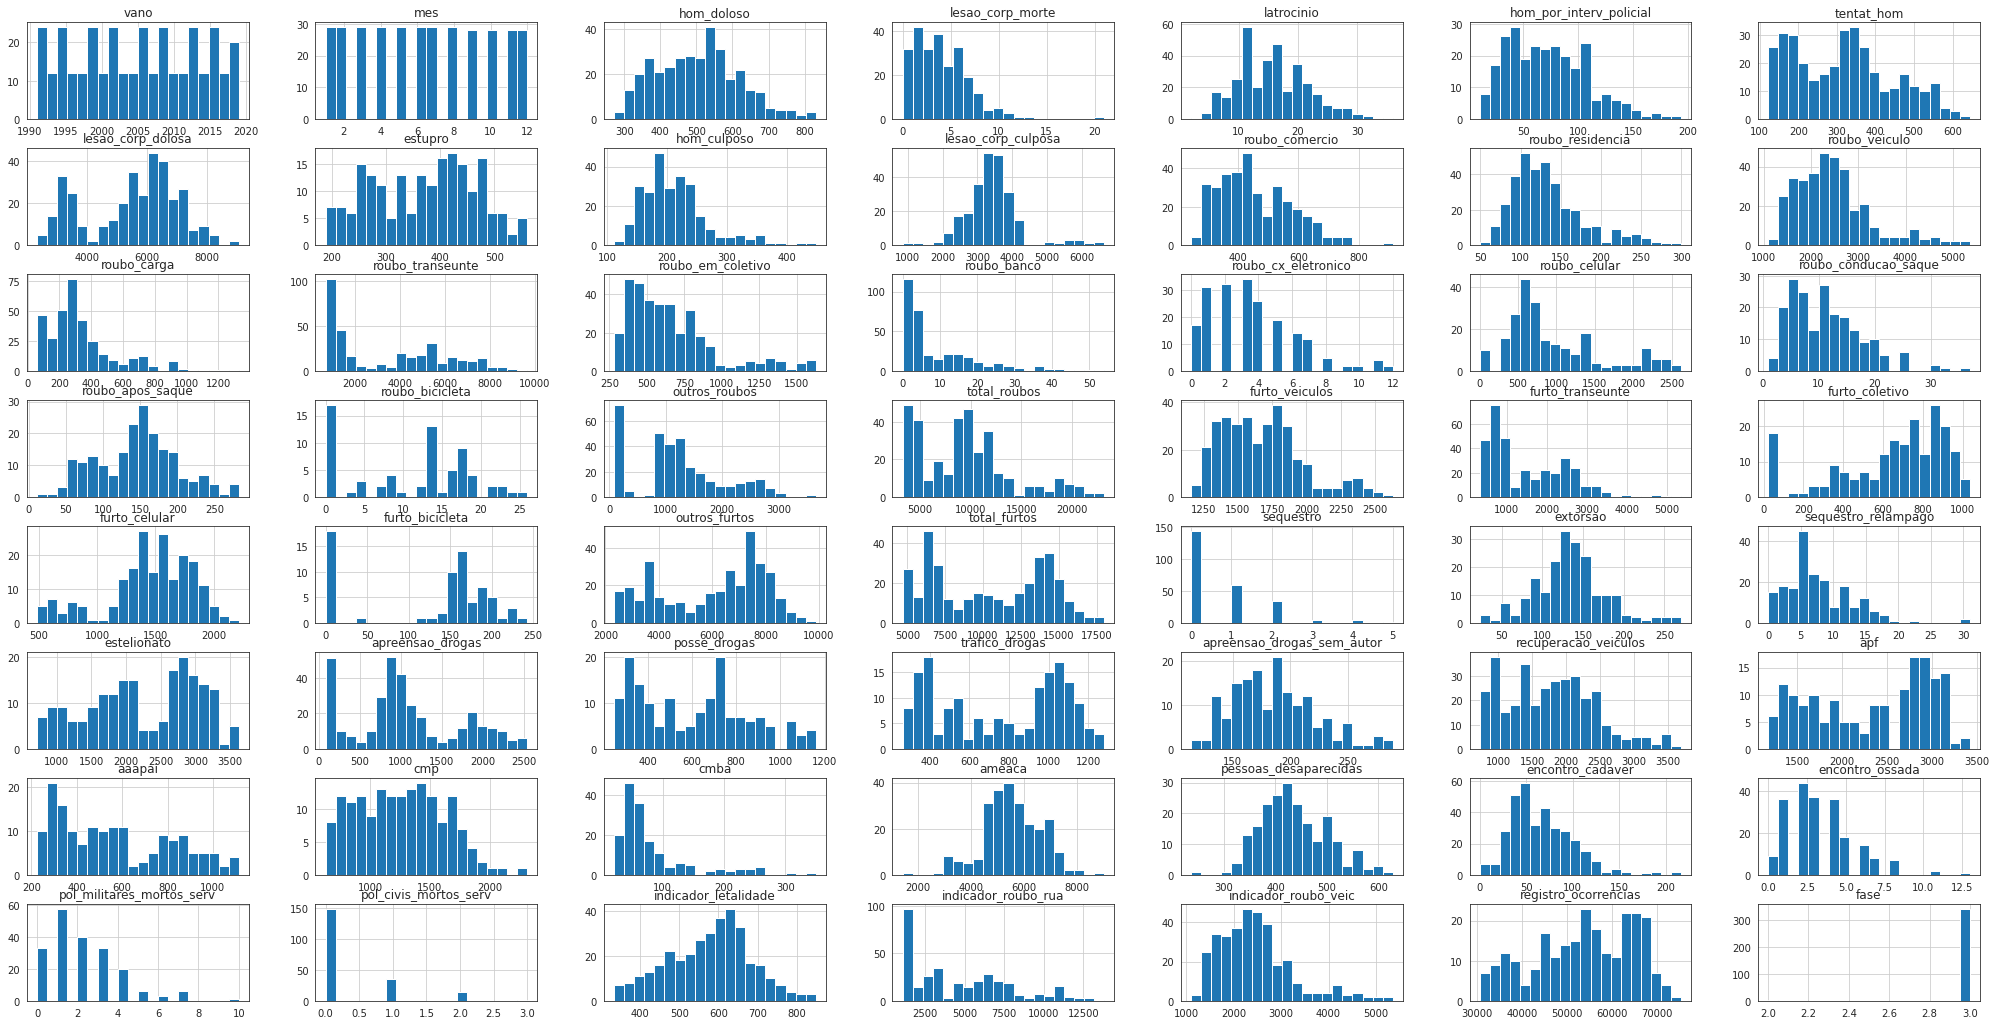

In [10]:
df.hist(bins=20, figsize=(35,18));


In [11]:
df.columns #pegaremos o nome das nossas colunas para verificar os outliers logo abaixo

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

## Informações Estatística do Mapa da Violência no Rio de Janeiro

Abaixo colheremos alguns dados estatisticos que nos ajudarão a compreender o nosso conjunto de dados. Essas informações como media, mediana, valores máximo e mínimo vão nos fornecer ideias importantes para fazer a compreensão desse estudo.


In [12]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

#Analise de Roubo e Furtos a Veiculos

<img alt="Roubo e Furto Carros" width="70%"  src="https://cdn.salaodocarro.com.br/_upload/content/2017/06/01/roubo-carros-aumenta-50-rio-janeiro_album.jpg">

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


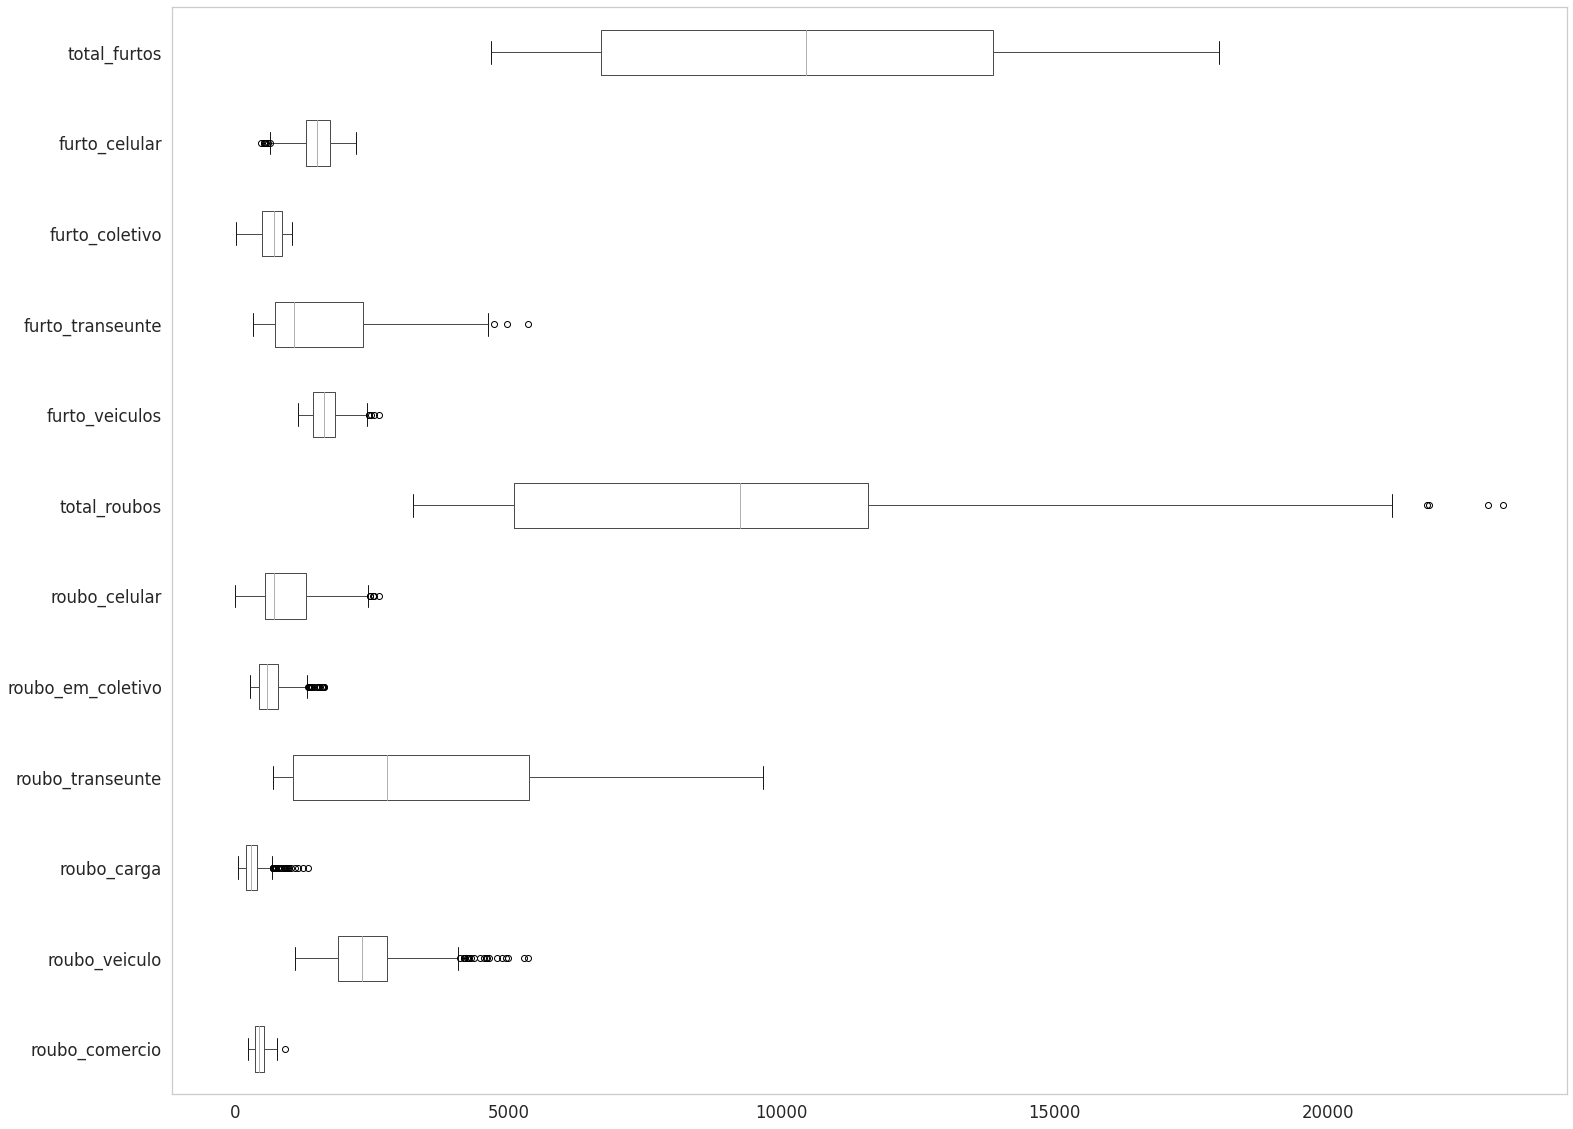

In [149]:
#Plotando a checagem de Outliers para as variaveis mais significativas para a nossa analise. 
fig, ax = plt.subplots(figsize=(25,20))
df.boxplot(column=['roubo_comercio', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_celular', 
       'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
        'total_furtos'],grid=False, vert=False, ax=ax)
plt.show()


In [13]:
print('A media de roubo seguido de morte e de:' ,round(df.latrocinio.mean(),2))
print('A media de roubo de veiulos e de:' ,round(df.roubo_veiculo.mean(),2))
print('A media de furto de veiulos e de:' ,round(df.furto_veiculos.mean(),2))
print('A media de veiculos que foram recuperados e de:' ,round(df.recuperacao_veiculos.mean(),2) )


A media de roubo seguido de morte e de: 15.67
A media de roubo de veiulos e de: 2448.7
A media de furto de veiulos e de: 1674.67
A media de veiculos que foram recuperados e de: 1772.24


In [14]:
#calcular % de carros recuperados

p_carros_recuperados = df.recuperacao_veiculos.sum() / ((df.roubo_veiculo.sum()) + (df.furto_veiculos.sum()))

print("A porcentagem de recuperação de carros roubados e furtados é de {:.2%}.".format(p_carros_recuperados))

A porcentagem de recuperação de carros roubados e furtados é de 42.98%.


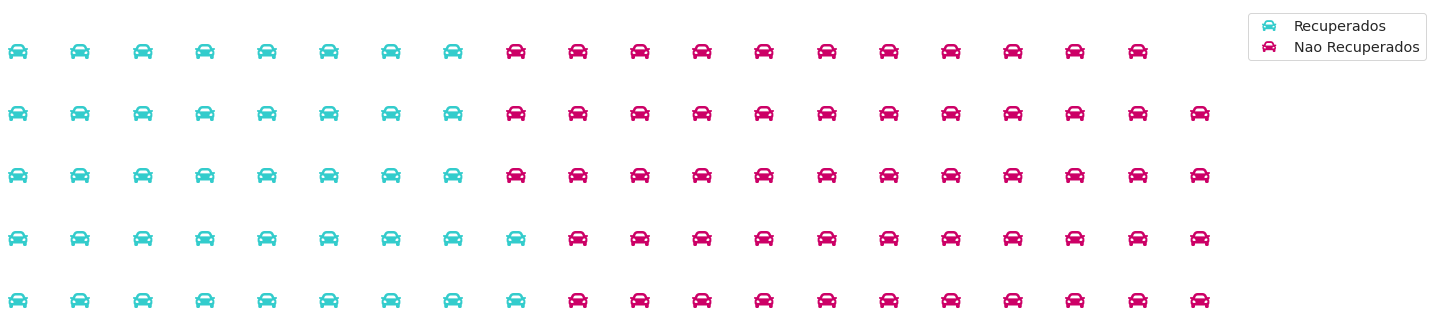

In [15]:
#Plotando o grafico da recuperacao de carros nos traria essa informacao
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[42, 57
            ],
    icons='car',
    colors=["#33CCCC", "#CC0066"],
    font_size=20,
    figsize=(20,5),
    icon_style='solid',
    icon_legend=True,
    legend={
        'labels': ['Recuperados', 'Nao Recuperados'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1),
        'fontsize': 'x-large'
    }

)
fig.tight_layout()
plt.savefig('car.jpg', dpi=100)
plt.show()

In [16]:
df[df.total_furtos == 18003.000000]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
278,2014,3,510,5.0,10,46.0,544,8357,479.0,214.0,3938.0,773,125,2947,401,7014,639,2,4.0,555.0,16.0,94.0,0.0,1141,13711,1640,4564,974.0,1577.0,0.0,9248,18003,1.0,175.0,17.0,2745.0,2046,871.0,1002.0,228.0,2355,3154.0,1077.0,1533.0,60.0,8154.0,563.0,59,2.0,5.0,0.0,571,8208,2947,72915.0,3


In [17]:
df[df.total_roubos == 23203.000000]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
316,2017,5,425,1.0,20,97.0,504,5190,419.0,188.0,2755.0,669,124,4596,1240,9669,1616,1,12.0,2548.0,7.0,53.0,13.0,2655,23203,1302,1866,813.0,1410.0,243.0,8359,13993,1.0,156.0,17.0,3059.0,1862,610.0,1114.0,182.0,3522,2982.0,639.0,1443.0,128.0,4650.0,379.0,18,4.0,1.0,0.0,543,13833,4596,71895.0,3


Conforme os dados acima, podemos constatar que - estatisticamente - 



*   A média de roubos de veículos é de: `2448.7`
*   A média de furtos de veículos é de: `1674.67`
*   A média de recuperação de veículos é de: `1772.24`
*   A porcentagem de recuperação de carros roubados e furtados é de `42.98%`.
*   A quantidade `mínima` de homicidios dolosos foi de: `272 homicidios`
*   A quantidade `máxima` de homicidios dolosos foi de: `831 homicidio`
*   O mês com a `maior` quantidade de `roubos` foi: `Abril de 2017`, com `23203 roubos`.
*   O mês com a `maior` quantidade de `furtos` foi: `Março de 2014`, com `18003 furtos`.











# Data Visualization - momento em que transformamos nossos dados em informações

<img alt="Roubo e Furto Carros" width="70%"  src="https://boostlabs.com/wp-content/uploads/2019/09/10-types-of-data-visualization-1.jpg">

Construiremos alguns graficos ja que por ora sabemos - ainda que de forma superficial, as caracteristicas do nosso conjunto de dados (`dataset`). 

Essa acao fara com que interpretemos os dados acima extraidos facilitando nosso entendimento e a nossa analise sobre a Criminalidade do Estado do Rio de Janeiro.



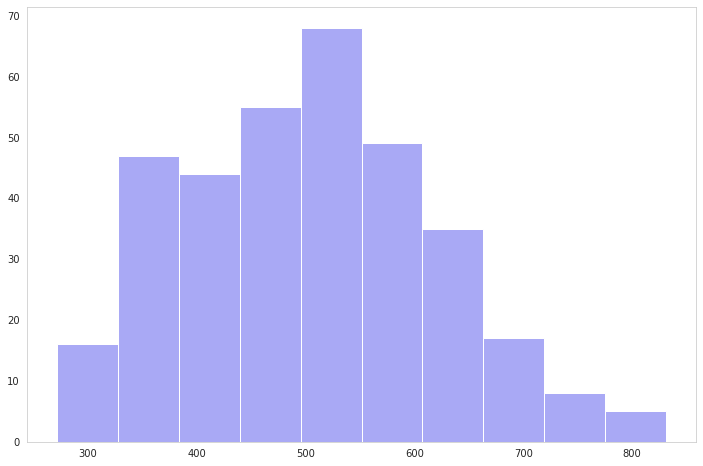

In [18]:
#histograma homicidio doloso - quando ha intencao de matar

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,8))
df.hom_doloso.hist(color = '#A9A9F5', ax=ax)
ax.grid(False)


Através do histograma podemos verificar que:



*   Na maioria dos meses, o número de homicídios ficou entre `400 e 600`.
*   Um número muito baixo `(<20)` de meses possuem um número menor que `300` homicídios.
*   Alguns meses tiveram um número maior que `800` homicídios.
*   Quase `70` meses tiveram um número de homicídios entre `500 e 550`.




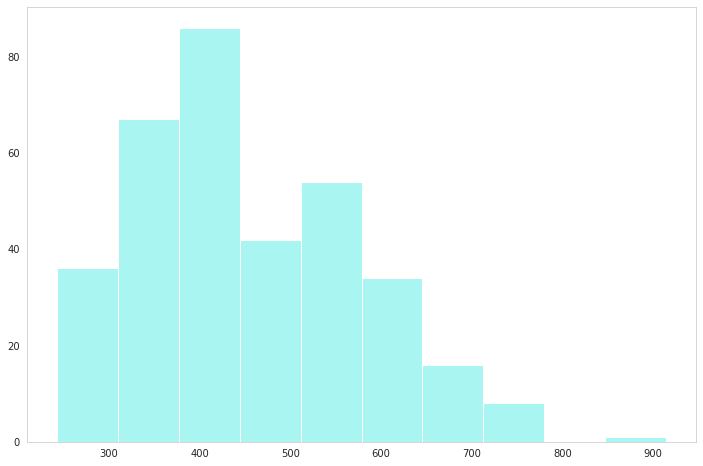

In [19]:
#histograma homicidio doloso

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,8))
df.roubo_comercio.hist(color = '#A9F5F2', ax=ax)
ax.grid(False)

De acordo com o grafico acima, podemos tirar as seguintes conclusoes



*   A media de roubos em comercio se da entre `400` & `500`;
*   Mais de 80 meses tiveram 400 roubos em comercio pelo menos;



#Correlação entre as variaveis

Abaixo vamos implementar e verificar o quanto uma variavel impacta nos dados de outra variavel.

Cada quadrado mostra a correlação entre as variáveis em cada eixo. A correlação `varia` de `-1 a 1`. Valores **mais próximos de zero** **significam que não há tendência linear entre as duas variávei**s.

Quanto mais próxima de 1 a correlação é, mais positivamente correlacionados eles são; isto é, à medida que um aumenta, o outro aumenta e **quanto mais próximo de 1, mais forte é a relação.**

Uma correlação mais próxima de -1 é semelhante, mas em vez de aumentar uma variável diminuirá à medida que a outra aumenta

In [20]:
corr = df[['vano', 'mes', 'hom_doloso',  'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'estupro',
       'hom_culposo', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_celular', 
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
        'furto_coletivo', 'furto_celular',
        'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 
       'recuperacao_veiculos', 'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
      'registro_ocorrencias']].corr()


#show correlation matrix
display(corr)

,vano,mes,hom_doloso,latrocinio,hom_por_interv_policial,tentat_hom,estupro,hom_culposo,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_celular,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_coletivo,furto_celular,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,recuperacao_veiculos,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
vano,1.000000,-0.023117,-0.787954,-0.193495,0.348200,0.920857,0.769110,-0.729137,0.431811,-0.499714,0.581047,0.744539,0.915297,0.662307,-0.760950,0.474497,0.521959,0.552910,0.893201,-0.751390,0.693570,0.270723,0.868290,0.872604,-0.129442,0.243974,0.376463,0.872581,0.886567,0.704862,0.903709,0.663975,-0.148525,-0.153724,0.927262
mes,-0.023117,1.000000,-0.147254,-0.009709,-0.075428,-0.035351,0.010458,0.121516,-0.028679,-0.022314,-0.078892,0.039179,-0.009561,-0.020893,-0.025573,0.001910,0.120360,-0.039157,-0.026548,-0.103046,0.098852,-0.027410,-0.030385,-0.046434,0.081025,-0.010554,-0.010440,0.064716,0.001450,0.039618,-0.023439,-0.059361,0.008166,-0.017301,0.000653
hom_doloso,-0.787954,-0.147254,1.000000,0.350517,0.106398,-0.638756,-0.659631,0.321079,-0.265414,0.558434,-0.189194,-0.434588,-0.663233,-0.390277,0.696099,-0.112002,-0.082710,-0.365401,-0.575451,0.705769,-0.716368,-0.392098,-0.723981,-0.724342,0.187881,-0.244552,-0.377134,-0.749668,-0.772473,-0.495734,-0.516782,-0.293159,0.331647,0.150768,-0.599659
latrocinio,-0.193495,-0.009709,0.350517,1.000000,0.164594,-0.131669,-0.251415,-0.043662,0.078347,0.442688,0.197046,0.004083,-0.065896,0.034941,0.152434,0.123474,0.112848,-0.037291,0.004912,0.322337,-0.217338,-0.106732,-0.139530,-0.147373,0.165112,-0.112790,-0.193640,-0.260260,-0.276498,-0.282605,-0.191288,0.102377,0.148454,0.093182,-0.127273
hom_por_interv_policial,0.348200,-0.075428,0.106398,0.164594,1.000000,0.357950,-0.334494,-0.353746,0.054250,0.257164,0.508261,0.429427,0.396065,0.592146,-0.368831,0.529628,0.385784,0.403316,0.577772,0.094559,-0.392406,-0.161000,0.189177,0.171671,0.011194,-0.244268,-0.272809,-0.165549,0.030290,-0.279655,-0.076327,0.567006,0.164315,0.040979,0.225099
tentat_hom,0.920857,-0.035351,-0.638756,-0.131669,0.357950,1.000000,0.570042,-0.696509,0.572488,-0.375707,0.628714,0.776077,0.865642,0.612824,-0.696145,0.495100,-0.238071,0.584136,0.883370,-0.661101,0.464884,0.039787,0.834291,0.822149,-0.066944,0.178720,0.312462,0.635349,0.865926,0.691042,0.770666,0.705472,0.026047,-0.102727,0.841354
estupro,0.769110,0.010458,-0.659631,-0.251415,-0.334494,0.570042,1.000000,-0.406848,0.189508,-0.619144,0.045838,0.231194,0.570682,0.109427,-0.275251,0.134273,-0.238830,-0.164438,0.311371,-0.649373,0.782079,0.366524,0.601703,0.626403,-0.153506,0.371247,0.444052,0.824353,0.687525,0.637822,0.658813,-0.087545,-0.269990,-0.080855,0.799602
hom_culposo,-0.729137,0.121516,0.321079,-0.043662,-0.353746,-0.696509,-0.406848,1.000000,-0.419189,-0.063919,-0.368998,-0.555978,-0.613315,-0.285136,0.500265,-0.412434,-0.119998,-0.137594,-0.616492,0.473403,-0.298117,0.044541,-0.632216,-0.597354,-0.037651,-0.021804,-0.143837,-0.500844,-0.602181,-0.632280,-0.725671,-0.491992,0.002352,0.191569,-0.643763
roubo_comercio,0.431811,-0.028679,-0.265414,0.078347,0.054250,0.572488,0.189508,-0.419189,1.000000,0.055225,0.512997,0.500859,0.391719,0.249327,-0.346099,0.369868,-0.206021,0.550132,0.545596,-0.334117,0.050687,-0.423611,0.530610,0.410300,0.101850,-0.032957,0.161479,0.268508,0.562303,0.710505,0.709150,0.613722,0.225858,-0.101874,0.271516
roubo_residencia,-0.499714,-0.022314,0.558434,0.442688,0.257164,-0.375707,-0.619144,-0.063919,0.055225,1.000000,-0.092299,-0.313238,-0.347796,-0.301217,0.311563,-0.179113,0.101796,-0.303644,-0.317196,0.698854,-0.644879,-0.338074,-0.287327,-0.269246,0.228929,-0.257363,-0.303214,-0.684616,-0.532507,-0.452917,-0.546309,-0.172579,0.262694,0.190128,-0.296890


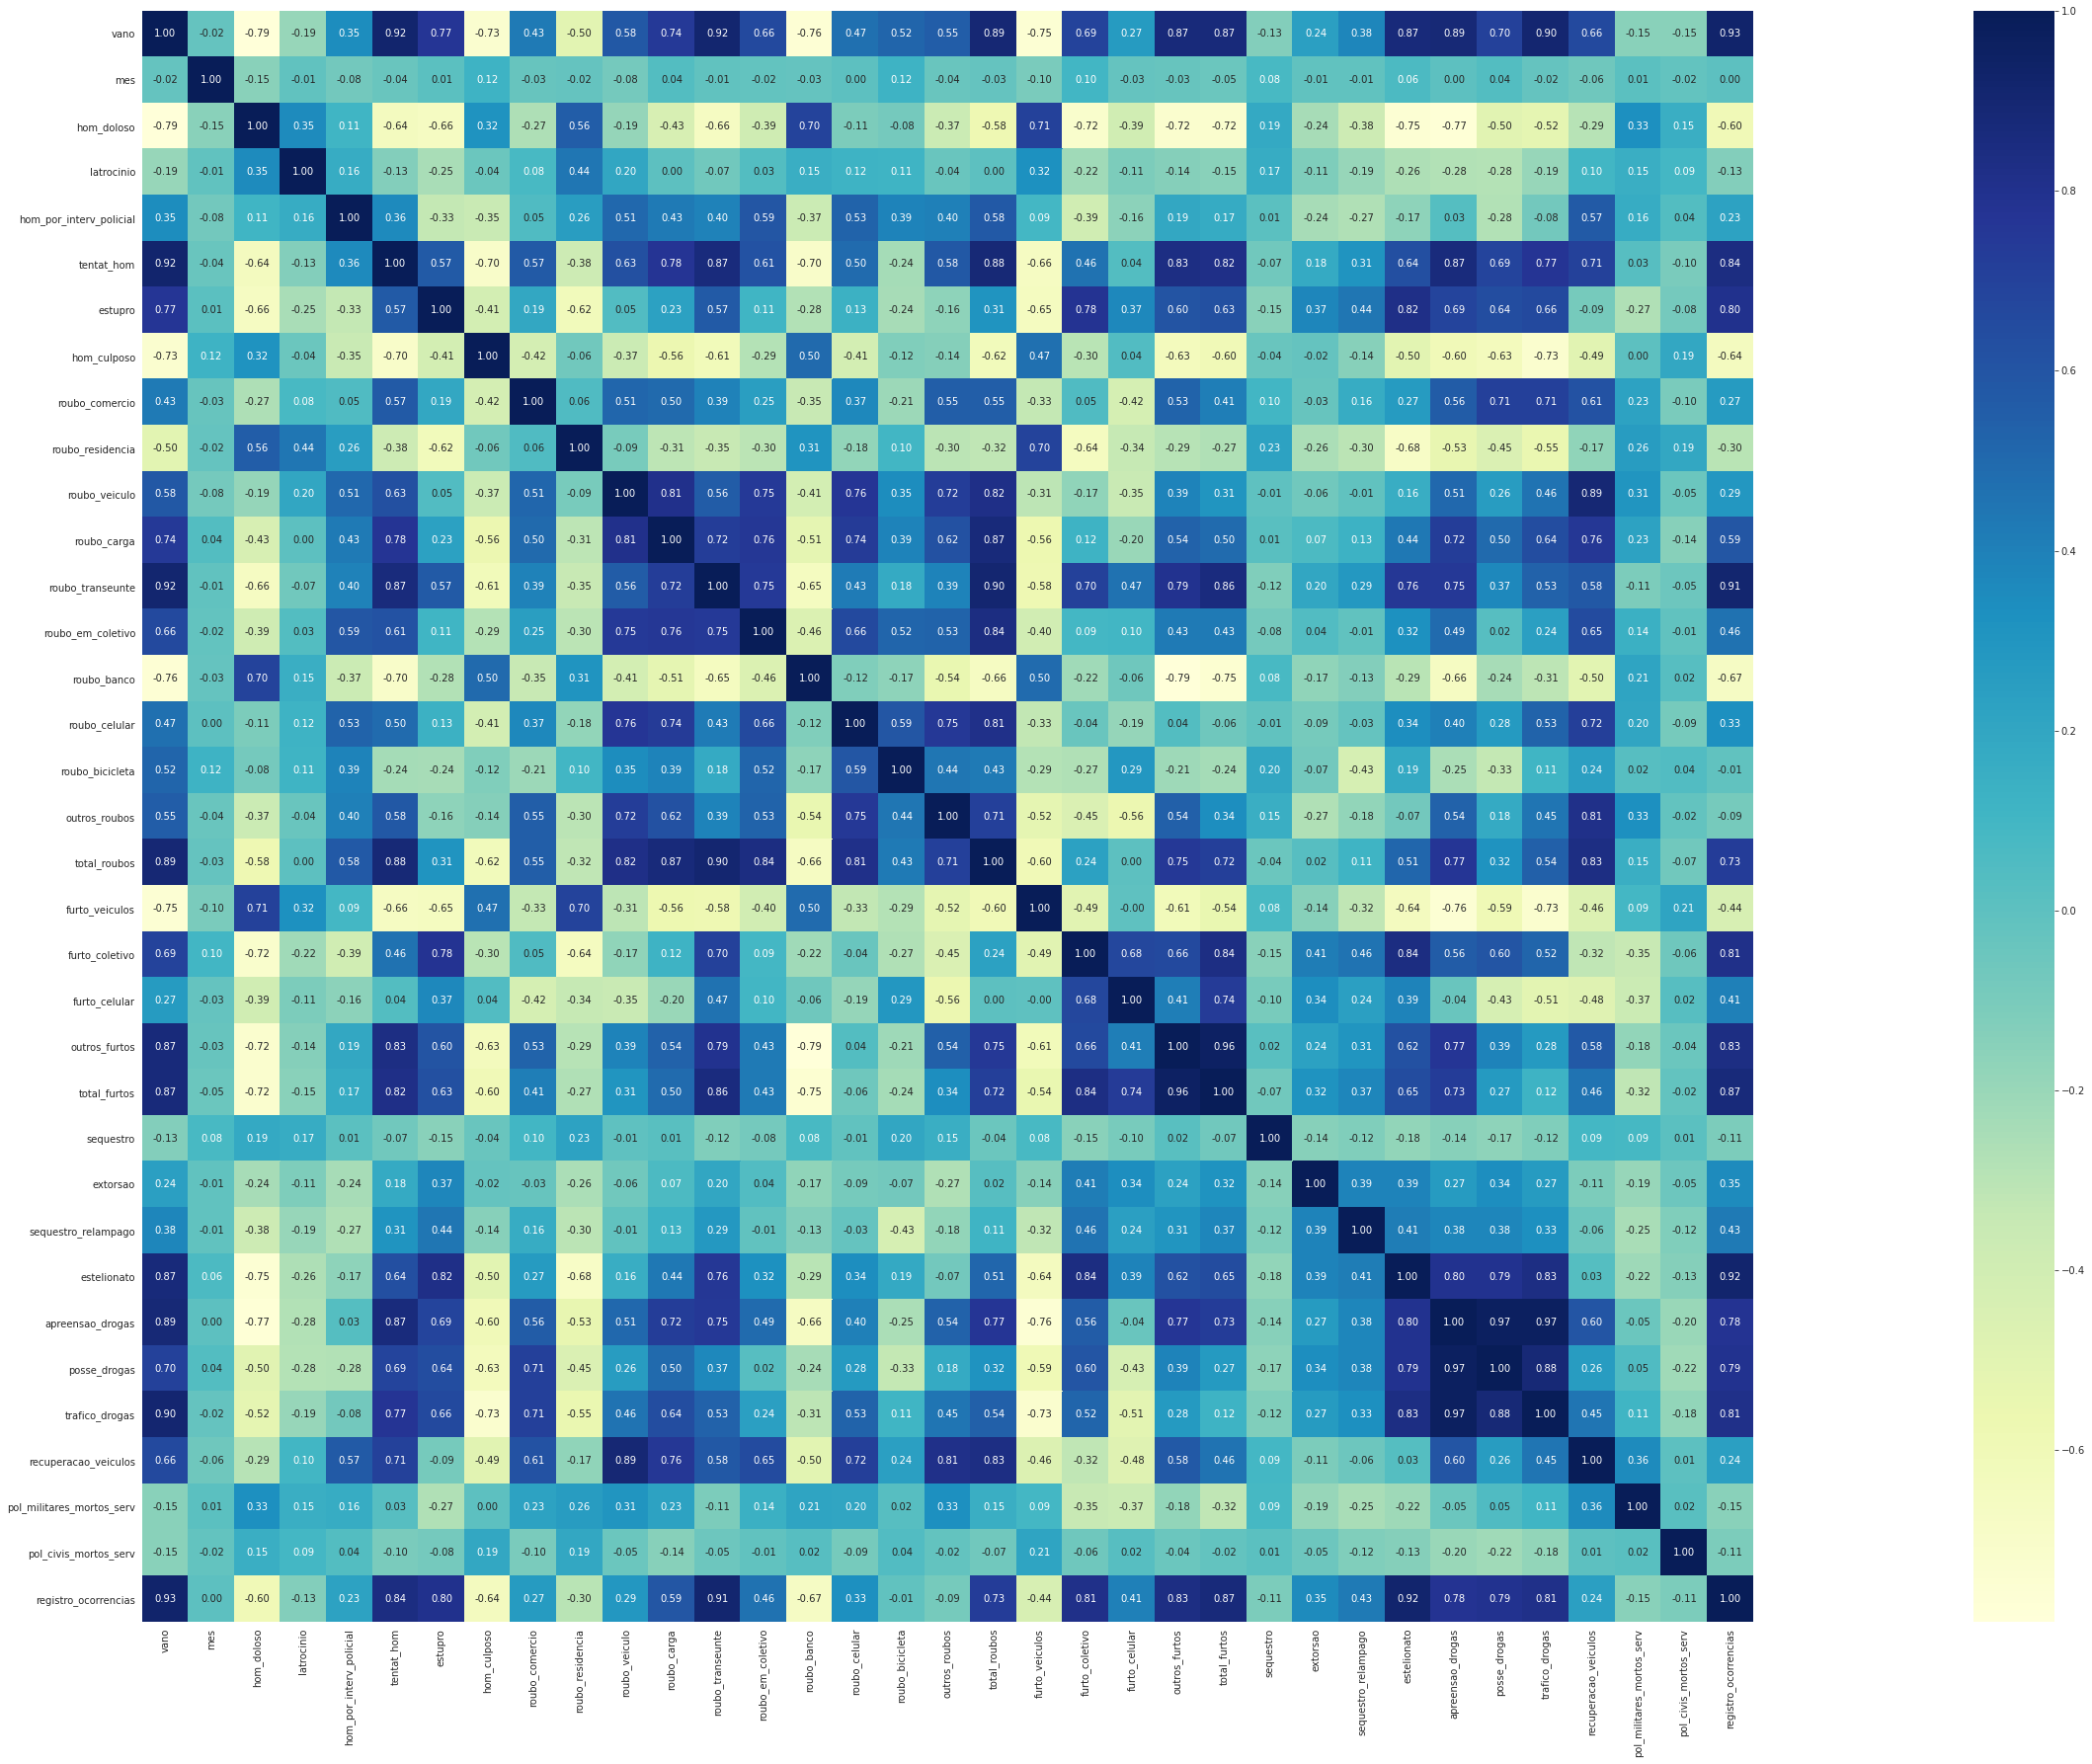

In [21]:
fig= plt.figure(figsize=(80,30))
sns.heatmap(corr, cmap='YlGnBu', fmt='.2f', square=True, linecolor='white', annot=True);


Uma vez que plotamos o mapa de calor das correlacoes listadas acima, o que facilita o nosso entendimento de qual variavel tem um impacto positivo ou negativo em outra variavel.

Podemos analisar algumas curiosidades, tais como:



*   A variavel de `roubo_cargas` tem uma forte relacao com a variavel de `posse_drogas`, sendo ela diretamente proporcional.
*   Assim como `hom_doloso` tem uma relacao inversamente proporcional a: `apreensao_drogas`

Com o grafico acima, deixo para voce leitor encontrar mais relacoes diretas e indiretas que possam nos ajudar a entender ainda mais a Criminalidade no Rio de Janeiro.

Ja com o grafico abaixo, podemos verificar o grafico de dispersao entre homicidio doloso e apreensao de drogas.



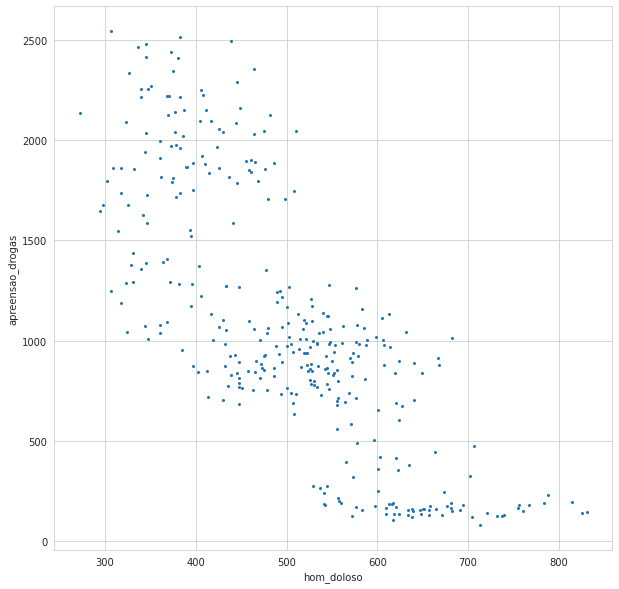

In [44]:
#plotando o grafico de dispersao entre homicidio doloso e apreensao de drogas
fig, ax = plt.subplots()


df.plot.scatter(x='hom_doloso', y='apreensao_drogas', ax=ax, s=4)
plt.gcf().set_size_inches((10, 10))
plt.show()

#Roubo a Transeunte

## O que e:

*Com fulcro no art. 157 do Código Penal Brasileiro, roubo a transeunte é um crime comum e corriqueiro caracterizado por assalto a indivíduos que são abordados enquanto transitam em vias públicas com subtração de pertences de forma violenta*

##Pena

*Art 155. Subtrair, para si ou para outrem, coisa alheia móvel: Pena - reclusão, de um a quatro anos, e multa.*

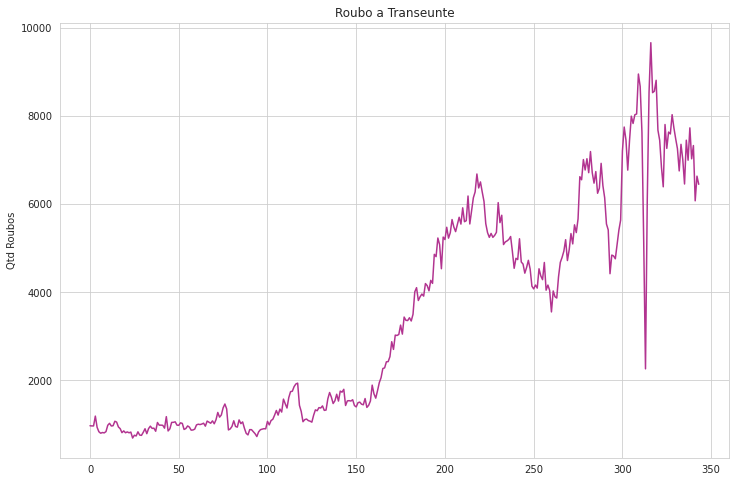

In [ ]:
#roubos em transeunte
df.roubo_transeunte.plot(ylabel= 'Qtd Roubos', title='Roubo a Transeunte', color = '#B23490' , figsize = (12,8));

#Tentativa de Homicidio

#O que e:

*Tentativa de homicídio, o autor tem como objetivo tirar a vida de uma pessoa (ou várias), apesar de não haver conseguiu. Nesse tipo de caso, pode até haver lesões corporais e comprometimento da integridade física ou da saúde da vítima, mas não há morte.*

## Pena
*Art 121. Matar alguem:Pena - reclusão, de seis a vinte anos.*

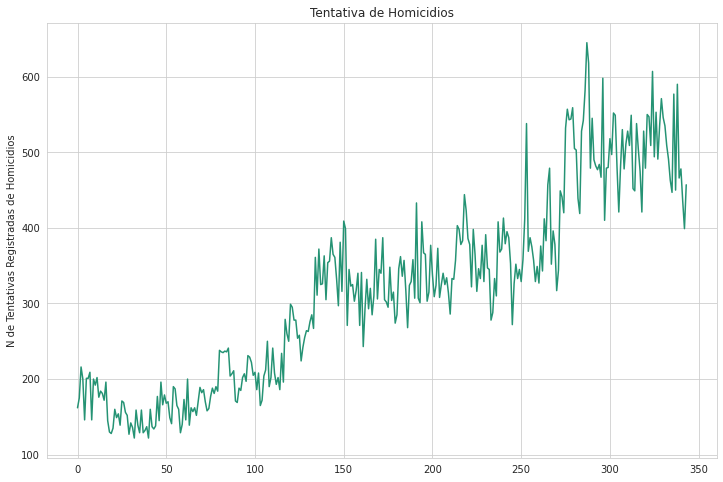

In [ ]:
#Tentativas de Homicidios
df.tentat_hom.plot(ylabel= 'N de Tentativas Registradas de Homicidios', title='Tentativa de Homicidios', color = '#259374' , figsize = (12,8));

#Comparativo entre Roubos e Furtos do Estado do Rio de Janeiro

<center><img alt="Roubo e Furto" width="100%"  src="https://spbancarios.com.br/sites/default/files/styles/destaque_full/public/destaques/cliente_e_morto_apos_tentativa_de_assalto_em_agencia_do_itau.jpg?itok=0o_xADz9"></center>

O `crime de furto` é descrito **como subtração, ou seja, diminuição do patrimônio de outra pessoa, sem que haja violência**. O Código Penal prevê para o furto pena de reclusão de `1 a 4 anos e multa`.A lei prevê aumento de pena para quem cometa o crime durante a noite, e para os casos de furto de pequeno valor, permite diminuição ou até perdão de pena, aplicando-se apenas a pena de multa, é o chamado furto privilegiado.

...

O `roubo` **é crime mais grave, descrito na lei como subtração mediante grave ameaça ou violência**. A pena prevista é de `4 a 10 anos e multa`. A lei também prevê aumento de pena para o cometimento de crime sob certas circunstâncias como, utilização de arma, auxílio de mais uma pessoa, restrição de liberdade da vítima, entre outras.

[Fonte: TJDFT](https://www.tjdft.jus.br/institucional/imprensa/campanhas-e-produtos/direito-facil/edicao-semanal/furto-e-roubo#:~:text=Roubo%20e%20furto%20s%C3%A3o%20crimes,pois%20n%C3%A3o%20h%C3%A1%20viol%C3%AAncia%20Ex.&text=O%20roubo%20%C3%A9%20crime%20mais,mediante%20grave%20amea%C3%A7a%20ou%20viol%C3%AAncia.)

Antes, vamos remover o ano de 2019 do nosso conjunto de dados para que não interfira na nossa análise de roubos e furtos ao longo dos anos.

In [ ]:
df_clean = df.copy()

In [ ]:
df_drop = df_clean.drop(df_clean.index[336:])

In [ ]:
df_drop.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
331,2018,8,360,6.0,13,176.0,535,4655,433.0,157.0,2267.0,535,109,3910,673,7261,1400,2,2.0,2170.0,4.0,62.0,12.0,2620,18760,1398,1553,733.0,1302.0,162.0,6944,12092,0.0,149.0,12.0,3615.0,1994,694.0,1141.0,201.0,3368,3050.0,587.0,1727.0,260.0,4532.0,377.0,24,4.0,2.0,0.0,555,10831,3910,65797.0,3
332,2018,9,382,7.0,14,108.0,509,5344,489.0,157.0,2504.0,463,103,4053,578,6756,1275,1,1.0,2182.0,9.0,160.0,16.0,2385,17982,1339,1419,655.0,1173.0,161.0,6686,11433,0.0,146.0,5.0,2809.0,1959,747.0,1062.0,183.0,2625,2798.0,470.0,1633.0,190.0,4666.0,386.0,17,1.0,4.0,0.0,511,10213,4053,62376.0,3
333,2018,10,383,2.0,11,127.0,491,5472,488.0,153.0,2382.0,454,95,4242,651,7360,1441,1,8.0,2477.0,9.0,83.0,18.0,2308,19147,1428,1597,735.0,1368.0,206.0,7036,12370,0.0,143.0,8.0,2959.0,1735,666.0,939.0,165.0,3176,2727.0,515.0,1105.0,171.0,4877.0,427.0,16,2.0,1.0,1.0,523,11278,4242,65589.0,3
334,2018,11,378,3.0,12,136.0,463,5277,424.0,153.0,2283.0,441,84,4074,725,7017,1384,5,3.0,2346.0,6.0,79.0,16.0,2363,18543,1325,1560,737.0,1357.0,176.0,6963,12118,1.0,121.0,4.0,2879.0,1716,664.0,931.0,160.0,2848,2754.0,489.0,1233.0,259.0,4657.0,410.0,24,2.0,1.0,0.0,529,10747,4074,63281.0,3
335,2018,12,346,5.0,13,88.0,447,5737,430.0,191.0,2590.0,434,108,3812,788,6459,1183,1,4.0,2144.0,16.0,73.0,13.0,2168,17203,1353,1772,620.0,1377.0,168.0,6893,12183,1.0,123.0,7.0,2696.0,1585,640.0,815.0,165.0,2502,2471.0,490.0,1147.0,217.0,4835.0,422.0,24,3.0,1.0,0.0,452,9786,3812,62043.0,3


In [ ]:
df_mes = df_drop.copy()
df_mes = df_drop.groupby('mes').mean()

In [ ]:
df_mes.head()

,vano,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
mes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2004.5,536.392857,4.45,14.321429,69.809524,326.821429,5855.071429,381.1875,203.857143,3350.30,428.642857,135.857143,2447.785714,338.071429,3193.071429,585.535714,9.714286,4.1875,827.000000,10.9375,137.6875,9.6,1179.535714,8968.428571,1752.285714,1637.785714,583.4375,1493.2500,82.8,6170.571429,10762.107143,0.70,126.3750,8.3125,2103.250,1021.750000,601.538462,718.307692,177.538462,1763.107143,2197.461538,583.076923,1036.230769,66.076923,5821.00,472.705882,80.678571,2.882353,1.6875,0.4375,606.250000,4339.785714,2447.785714,53190.5,3.0
2,2004.5,537.142857,4.35,15.071429,62.285714,317.250000,5636.714286,347.1875,194.190476,3126.25,429.035714,129.035714,2333.214286,292.500000,3105.607143,567.892857,10.678571,3.7500,772.842105,10.1875,137.8750,4.4,1169.714286,8649.642857,1600.785714,1944.928571,556.6250,1481.5625,64.6,5802.535714,10524.464286,0.45,117.3750,7.5000,1799.000,974.678571,552.846154,669.923077,176.000000,1629.750000,2162.384615,555.000000,1013.384615,60.000000,5341.60,412.882353,79.607143,2.411765,1.6250,0.1875,602.035714,4197.928571,2333.214286,50705.3,3.0
3,2004.5,574.428571,5.05,17.642857,74.142857,335.035714,5796.857143,384.6250,212.285714,3396.00,480.357143,145.178571,2651.785714,336.607143,3366.071429,678.071429,10.285714,3.8125,921.210526,14.6875,147.8125,10.2,1315.964286,9706.285714,1788.392857,1597.571429,646.3750,1479.0000,96.2,6261.857143,10879.500000,0.45,151.0625,6.2500,2191.250,1059.035714,594.384615,773.538462,190.923077,1847.464286,2436.384615,635.230769,1287.923077,67.307692,5872.30,467.529412,80.250000,4.352941,3.0625,0.3750,651.285714,4669.250000,2651.785714,55408.0,3.0
4,2004.5,534.500000,4.20,17.642857,73.761905,314.964286,5485.785714,356.2500,212.761905,3377.35,482.857143,136.607143,2571.892857,331.964286,3393.428571,681.750000,11.214286,4.0625,913.210526,12.3750,148.7500,8.0,1260.535714,9585.750000,1697.321429,1374.964286,636.1875,1350.8125,104.8,5878.857143,10105.285714,0.90,132.1875,8.0000,2054.125,1033.535714,588.000000,758.692308,188.538462,1856.000000,2391.230769,606.461538,1214.846154,66.846154,5572.45,429.823529,66.821429,1.941176,2.1250,0.3750,610.464286,4694.857143,2571.892857,52981.5,3.0
5,2004.5,518.285714,3.80,16.250000,78.904762,317.142857,5140.571429,349.3750,222.952381,3491.25,493.071429,139.892857,2547.750000,353.464286,3533.857143,701.178571,8.821429,3.6250,976.684211,12.5000,161.3125,8.4,1215.678571,9759.357143,1764.285714,1437.107143,694.1250,1448.8125,124.2,6069.464286,10517.571429,0.75,147.5625,8.6250,2327.375,1072.500000,587.307692,793.384615,201.000000,1921.107143,2410.384615,569.538462,1313.846154,77.692308,5384.65,411.470588,63.928571,4.411765,2.6875,0.6250,596.428571,4897.785714,2547.750000,54432.3,3.0


In [ ]:
df_ano = df_drop.copy()
df_ano = df_drop.groupby('vano').sum()

In [ ]:
totais = df_ano[['total_furtos','total_roubos']]
totais_mes = df_mes[['total_furtos','total_roubos']]

# Ao longo dos anos os crimes de furto e roubo aumentaram?

Analise sobre os dados de furto e roubo ao longo dos anos para diagnosticar se eles aumentaram ou diminuiram;



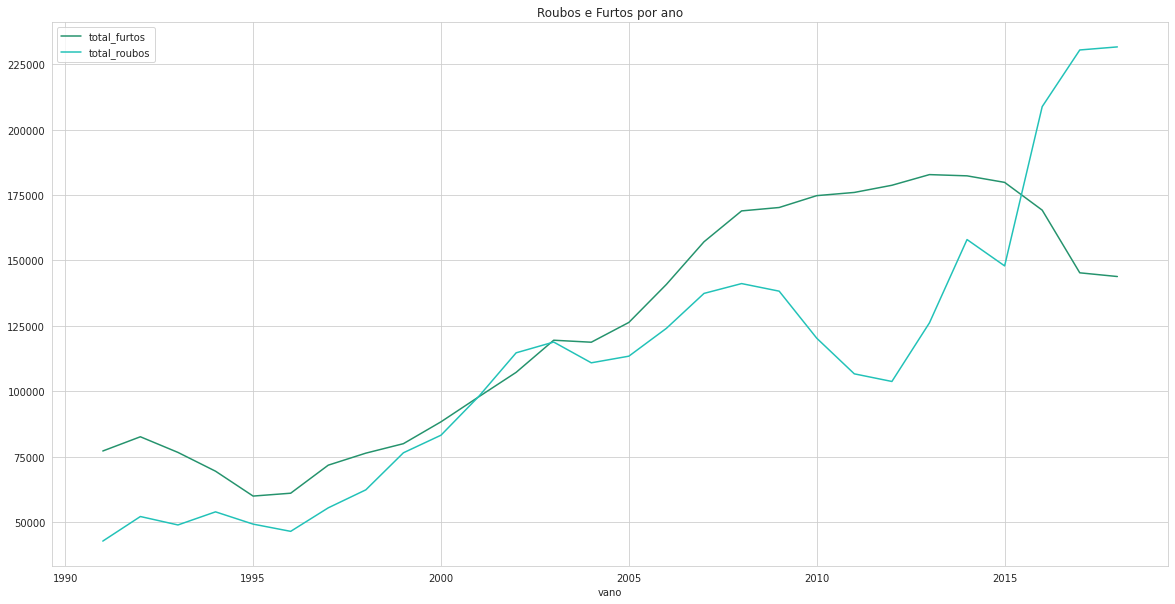

In [ ]:
totais.plot.line(title='Roubos e Furtos por ano', color = ['#25936D','#22C2B8'], figsize=(20,10))

Podemos verificar que nos ultimos 15 anos o numero de roubos e furtos duplicaram. 

Onde as acoes dos Governos de [Rosinha Garotinho (PSB)](https://pt.wikipedia.org/wiki/Rosinha_Garotinho) , [Sérgio Cabral Filho(PMDB)](https://pt.wikipedia.org/wiki/S%C3%A9rgio_Cabral_Filho),[Luiz Fernando Pezão (PMDB)](https://pt.wikipedia.org/wiki/Luiz_Fernando_Pez%C3%A3o), [Wilson Witzel (PSC)](https://pt.wikipedia.org/wiki/Wilson_Witzel) ajudaram a acentuar o tipo de violencia no Estado.



*   5 dos 7 Governadores do Estado do Rio de Janeiro desde 1982 estao na mira da Justica - leia a materia da exame [aqui](https://exame.com/brasil/5-dos-7-governadores-do-rio-desde-82-estao-na-mira-da-justica/). Os dois governadores restantes estao mortos e nao contabilizam para esses dados analisados pela Exame.
*   Todos os governadores eleitos do RJ nos últimos 20 anos foram presos, clique [aqui](https://noticias.r7.com/brasil/todos-os-governadores-eleitos-do-rj-nos-ultimos-20-anos-foram-presos-29112018)








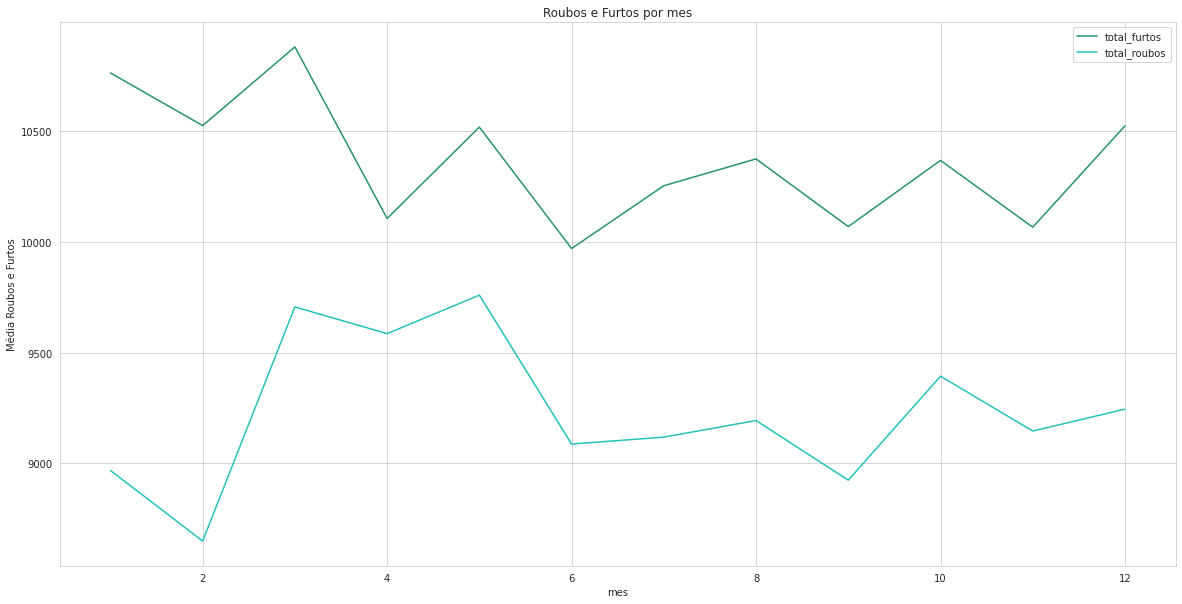

In [ ]:
sns.set_style('whitegrid')
totais_mes.plot.line(title='Roubos e Furtos por mes', ylabel= 'Média Roubos e Furtos', color = ['#25936D','#22C2B8'], figsize=(20,10));

Através da média de furtos e roubos ao longo dos meses, conseguimos ver a média de cada crime durante os 12 meses do ano. Vemos que:

Os meses de fevereiro é o mês com menor quantidade do roubos.

*   A alta de roubos ocorre durante os meses de março e maio.
*   Em abril o numero de furtos e mais baixo, assim como Junho passa a ser o menor media do ano.
*   Março é onde ocorre um pico de furtos e também de roubos.

Quais os tipos de roubos e furtos que mais contribuem para o total?

In [ ]:
roubos = df_drop[['vano','roubo_comercio',	'roubo_residencia',	'roubo_veiculo',	
                  'roubo_carga',	'roubo_transeunte',	'roubo_em_coletivo'	,'roubo_banco'
                  ,'roubo_cx_eletronico','roubo_celular','roubo_conducao_saque',
                  'roubo_apos_saque','roubo_bicicleta','outros_roubos', 'total_roubos']].set_index('vano').groupby('vano').sum()

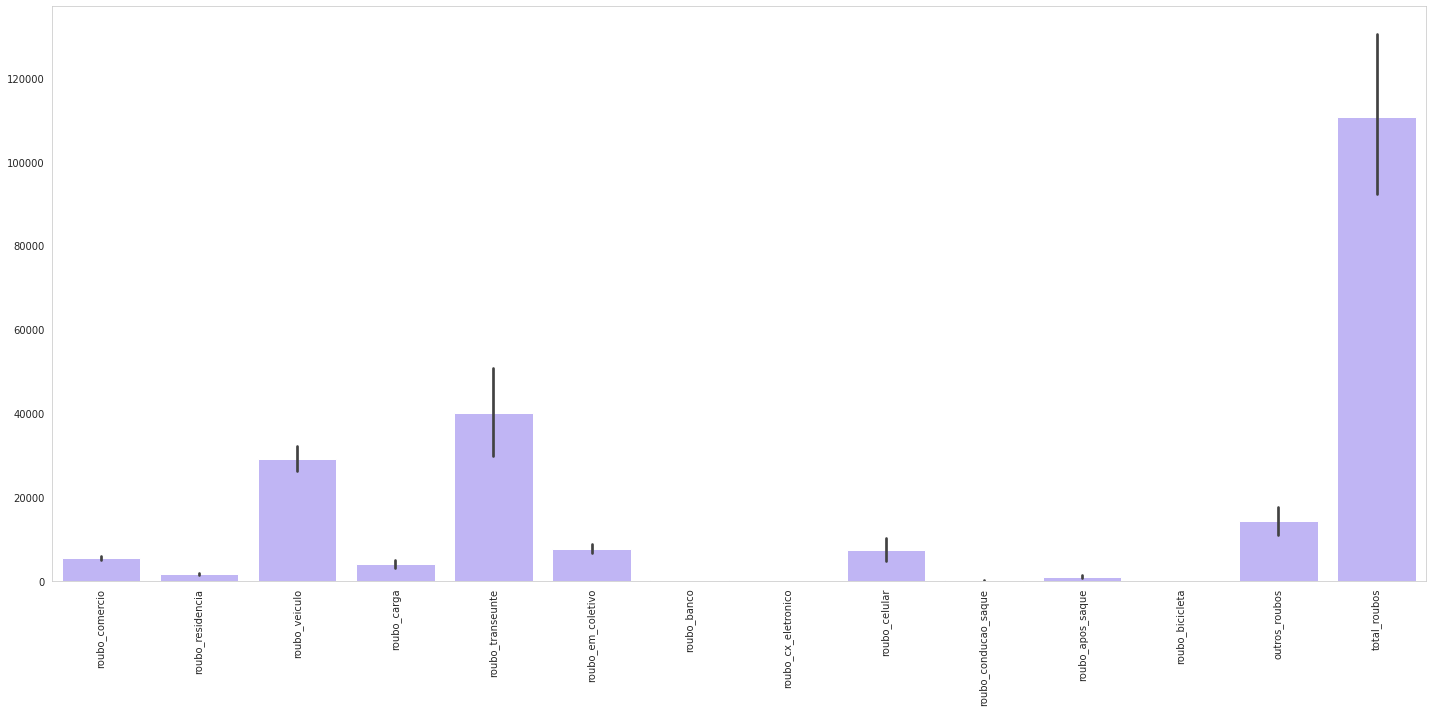

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(data=roubos, color='#B9AAFF')
plt.xticks(rotation=90)
ax.grid(False)

plt.tight_layout()

De acordo com o grafico acima, vemos quais categorias mais contribuiram para o numero de roubos nos ultimos anos.

In [ ]:
furtos = df_drop[['furto_veiculos',	'furto_transeunte',	'furto_coletivo',	'furto_celular',	'furto_bicicleta',	'outros_furtos',	'total_furtos']]

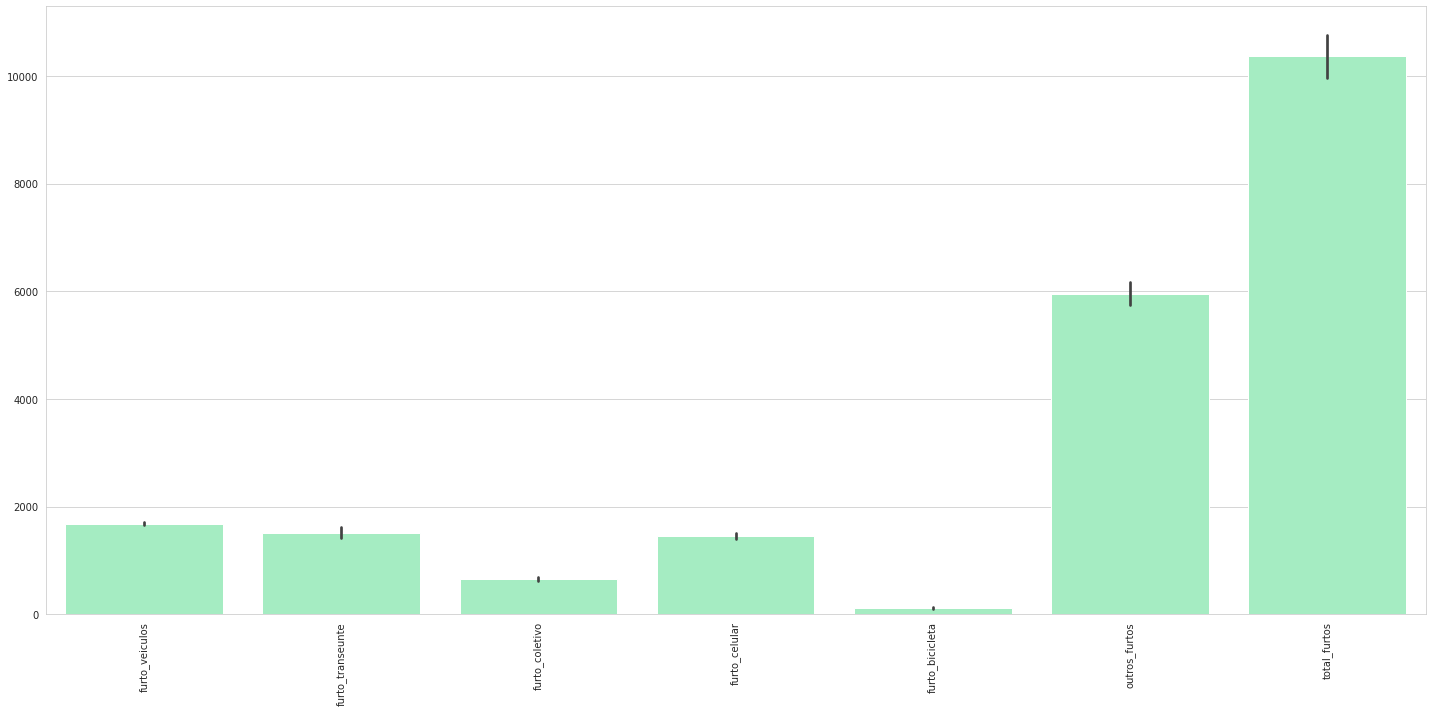

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(data=furtos, color='#99F8C0')
plt.xticks(rotation=90)

plt.tight_layout()
fig.savefig('furtos')


#Conclusão



Uma vez que realizamos uma limpeza dos dados do ano de 2019, pelo fato de os mesmos estarem incompletos - tornamos a nossa analise mais clara e precisa. 

Identificamos que existe um grande crescimento no numero de roubos principalmente nos ulitmos 15 anos. Um contraponto esta no numero de furtos, que vem decaindo. O que nos leva a crer, de certa forma, que o modus-operandi vem mudando para uma forma mais abrupta - ainda que sejam crimes similares na sua essencia.

Analisamos que os roubos que mais ocorrem hoje no Estado do Rio de Janeiro sao:


*   Roubo a Transeunte
*   Roubo a Veiculos
*   Roubo de Celulares
*   Roubo a Comercio

Assim como os furtos mais praticados pelos crimonosos sao os furtos de:

* Furto de Veiculos
* Furto a Transeunte
* Furto de Celulares
* Furto em Coletivos

Espero que esses dados possam ajudar outros analistas, estudantes e curiosos sobre o tema cruzando esses dados com outros dados que podem nos ajudar a mitigar a violencia no Estado. Essa breve analise faz parte de uma continuacao dos meus estudos com Data Science, e, portanto, sera revisitada num futuro nao ta distante para aprofundamento das tecnicas e uma melhor visualizacao dos dados.